In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df_train = pd.read_csv('../input/train.csv')
df_train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [3]:
print('Total number of question pairs for training: {}'.format(len(df_train)))
print('Duplicate pairs: {}%'.format(round(df_train['is_duplicate'].mean()*100, 2)))
qids = pd.Series(df_train['qid1'].tolist() + df_train['qid2'].tolist())
print('Total number of questions in the training data: {}'.format(len(np.unique(qids))))
print('Number of questions that appear multiple times: {}'.format(np.sum(qids.value_counts() > 1)))
# dont know how to deal with questions that have occurred multiple times

Total number of question pairs for training: 404290
Duplicate pairs: 36.92%
Total number of questions in the training data: 537933
Number of questions that appear multiple times: 111780


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
id              404290 non-null int64
qid1            404290 non-null int64
qid2            404290 non-null int64
question1       404289 non-null object
question2       404288 non-null object
is_duplicate    404290 non-null int64
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [5]:
df_train.shape

(404290, 6)

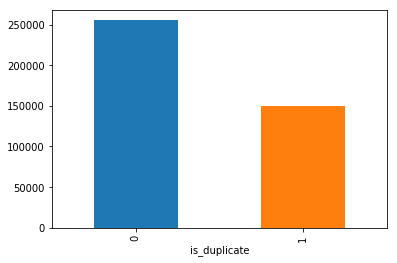

In [6]:
df_train.groupby("is_duplicate")['id'].count().plot.bar()

In [7]:
dfq1, dfq2 = df_train[['qid1', 'question1']], df_train[['qid2', 'question2']]
dfq1.columns = ['qid1', 'question']
dfq2.columns = ['qid2', 'question']

dfq1.head()

,qid1,question
0,1,What is the step by step guide to invest in sh...
1,3,What is the story of Kohinoor (Koh-i-Noor) Dia...
2,5,How can I increase the speed of my internet co...
3,7,Why am I mentally very lonely? How can I solve...
4,9,"Which one dissolve in water quikly sugar, salt..."


In [8]:
df_train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [9]:
dfq2.head()

,qid2,question
0,2,What is the step by step guide to invest in sh...
1,4,What would happen if the Indian government sto...
2,6,How can Internet speed be increased by hacking...
3,8,Find the remainder when [math]23^{24}[/math] i...
4,10,Which fish would survive in salt water?


In [10]:
dfqa = pd.concat((dfq1, dfq2), axis=0).fillna("")
dfqa.tail(10)

C:\Users\Manali Damania\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,qid1,qid2,question
404280,,537923,What are some outfit ideas wear to a frat them...
404281,,81495,Why is Manaphy annoying in Pokemon ranger and ...
404282,,16773,How are long distance relationships maintained?
404283,,537925,What will the CPU upgrade to the 2016 Apple Ma...
404284,,537927,What does Jainism say about Gays and Homosexua...
404285,,379845,How many keywords are there in PERL Programmin...
404286,,155606,Is it true that there is life after death?
404287,,537929,What's this coin?
404288,,537931,I am having little hairfall problem but I want...
404289,,537933,What is it like to have sex with your cousin?


In [11]:
len(dfqa)

808580

In [12]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

In [13]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Create text
text_data = np.array(dfqa['question'])
text_data

array(['What is the step by step guide to invest in share market in india?',
       'What is the story of Kohinoor (Koh-i-Noor) Diamond?',
       'How can I increase the speed of my internet connection while using a VPN?',
       ..., "What's this coin?",
       'I am having little hairfall problem but I want to use hair styling product. Which one should I prefer out of gel, wax and clay?',
       'What is it like to have sex with your cousin?'], dtype=object)

In [14]:
tfidf = TfidfVectorizer( stop_words = 'english',max_features = 300)
feature_matrix = tfidf.fit_transform(text_data)

# Show tf-idf feature matrix
feature_matrix.shape

(808580, 300)

In [15]:
feature_matrix.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
tfidf.get_feature_names()

['10',
 '1000',
 '2016',
 '2017',
 '500',
 'account',
 'actually',
 'affect',
 'age',
 'america',
 'american',
 'android',
 'answer',
 'answers',
 'app',
 'apply',
 'ask',
 'available',
 'average',
 'bad',
 'bank',
 'believe',
 'best',
 'better',
 'big',
 'black',
 'body',
 'book',
 'books',
 'build',
 'business',
 'buy',
 'car',
 'card',
 'career',
 'cat',
 'change',
 'china',
 'chinese',
 'class',
 'clinton',
 'code',
 'college',
 'com',
 'come',
 'common',
 'companies',
 'company',
 'compare',
 'computer',
 'considered',
 'control',
 'cost',
 'countries',
 'country',
 'course',
 'create',
 'culture',
 'dark',
 'data',
 'day',
 'days',
 'deal',
 'delete',
 'delhi',
 'design',
 'development',
 'did',
 'die',
 'difference',
 'differences',
 'different',
 'does',
 'doesn',
 'doing',
 'don',
 'donald',
 'download',
 'earn',
 'earth',
 'eat',
 'economy',
 'effects',
 'election',
 'email',
 'employees',
 'end',
 'energy',
 'engineer',
 'engineering',
 'english',
 'exam',
 'examples',
 'exi

In [17]:
a=pd.DataFrame(feature_matrix.toarray(), columns=tfidf.get_feature_names())
a

,10,1000,2016,2017,500,account,actually,affect,age,america,...,word,work,working,world,worth,write,writing,year,years,youtube
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
5,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
6,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
7,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
8,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
9,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000


In [18]:
#finding the top features from tdidf
indices = np.argsort(tfidf.idf_)[::-1]
features = tfidf.get_feature_names()
n= 10
top_features = [features[i] for i in indices[:n]]
print(top_features)

['hotel', 'culture', 'police', 'speed', 'dark', 'design', 'living', 'math', 'universe', 'list']


In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk import word_tokenize, ngrams
from sklearn import ensemble
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss
import xgboost as xgb
#finding the number of words in each question

dfqa["num_of_words"] = dfqa["question"].apply(lambda x : len(str(x).split()))

In [20]:
dfqa['num_of_words'].head()

0    14
1     8
2    14
3    11
4    13
Name: num_of_words, dtype: int64

In [21]:
dfqa.head()

,qid1,qid2,question,num_of_words
0,1,,What is the step by step guide to invest in sh...,14
1,3,,What is the story of Kohinoor (Koh-i-Noor) Dia...,8
2,5,,How can I increase the speed of my internet co...,14
3,7,,Why am I mentally very lonely? How can I solve...,11
4,9,,"Which one dissolve in water quikly sugar, salt...",13


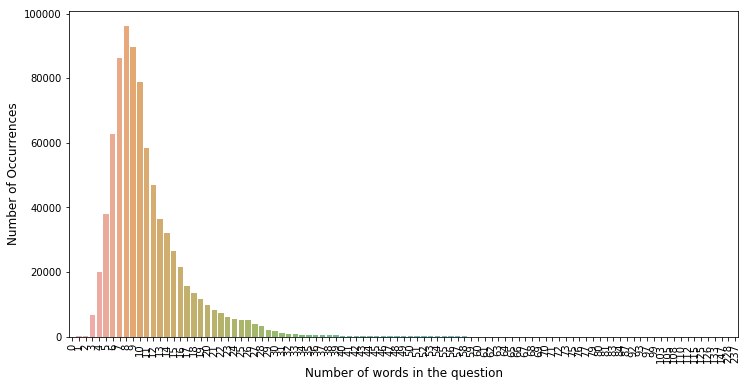

In [22]:
cnt_srs = dfqa['num_of_words'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of words in the question', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

#calculate the mean of number of words

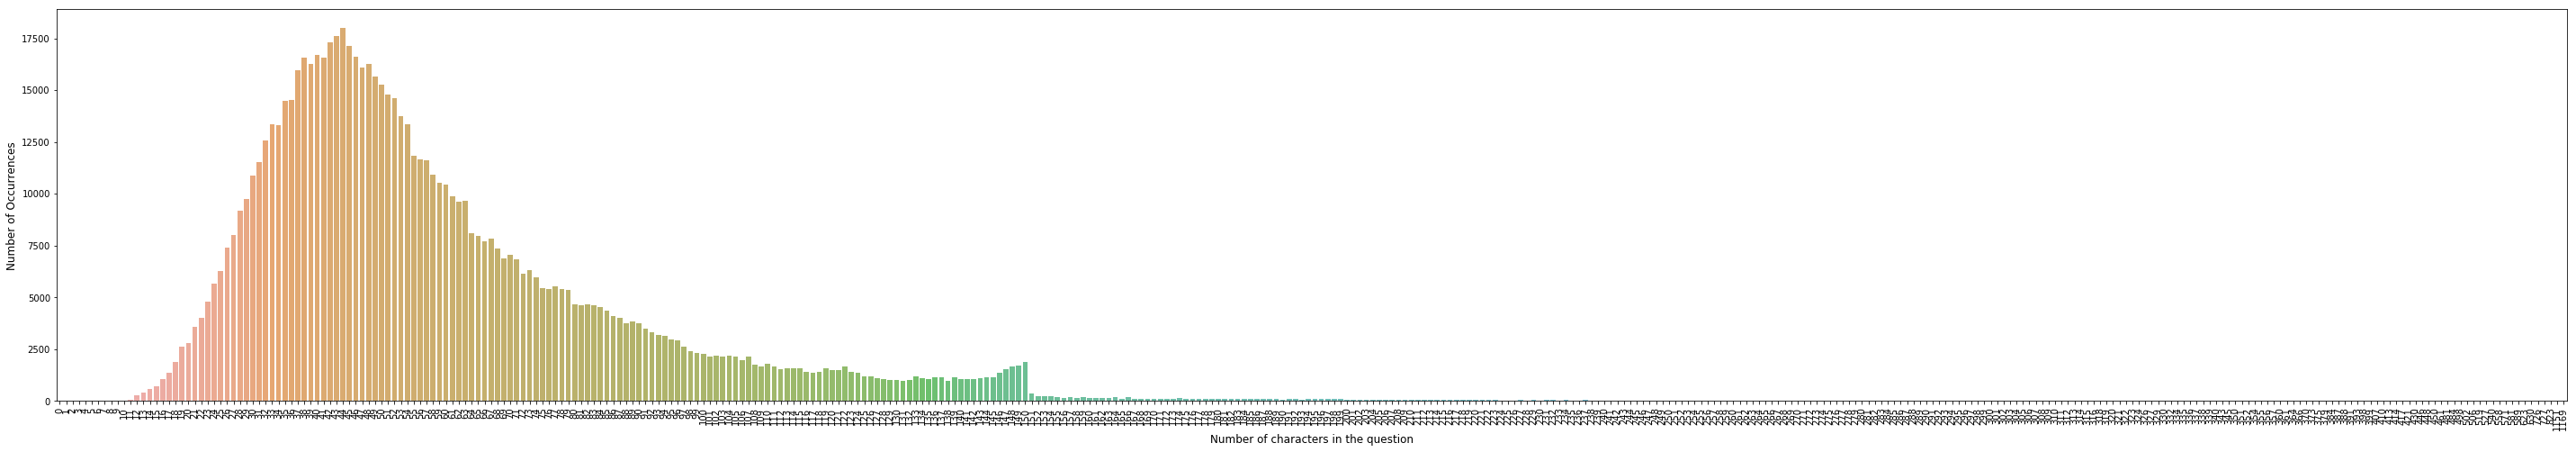

In [23]:
#no of characters in each question
dfqa["num_of_chars"] = dfqa["question"].apply(lambda x : len(str(x)))
cnt_srs = dfqa['num_of_chars'].value_counts()

plt.figure(figsize=(50,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of characters in the question', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()      
# mean of the characters




In [27]:
#mean of char and words
dfqa.describe()

,num_of_words,num_of_chars
count,808580.000000,808580.000000
mean,11.062097,59.822537
std,5.884602,31.963772
min,0.000000,0.000000
25%,7.000000,39.000000
50%,10.000000,51.000000
75%,13.000000,72.000000
max,237.000000,1169.000000


In [24]:
#####exploring the unigrams count
eng_stopwords = set(stopwords.words('english'))
def get_unigrams(que):
    return [word for word in word_tokenize(que.lower()) if word not in eng_stopwords]

def get_common_unigrams(row):
    return len( set(row["unigrams_ques1"]).intersection(set(row["unigrams_ques2"])) )

def get_common_unigram_ratio(row):
    return float(row["unigrams_common_count"]) / max(len( set(row["unigrams_ques1"]).union(set(row["unigrams_ques2"])) ),1)

df_train["unigrams_ques1"] = df_train['question1'].apply(lambda x: get_unigrams(str(x)))
df_train["unigrams_ques2"] = df_train['question2'].apply(lambda x: get_unigrams(str(x)))
df_train["unigrams_common_count"] = df_train.apply(lambda row: get_common_unigrams(row),axis=1)
df_train["unigrams_common_ratio"] = df_train.apply(lambda row: get_common_unigram_ratio(row), axis=1)

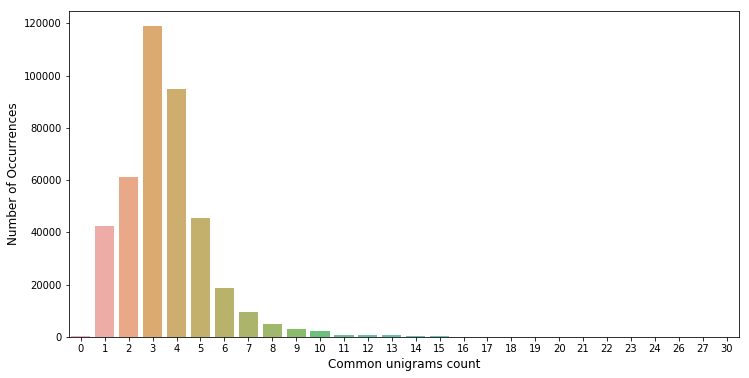

In [25]:
cnt_srs = df_train['unigrams_common_count'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Common unigrams count', fontsize=12)
plt.show()

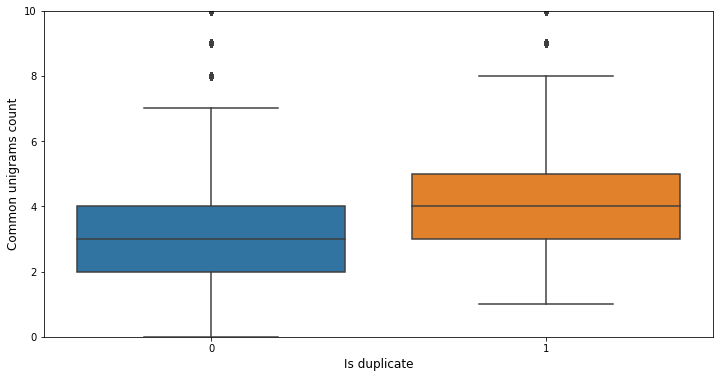

In [26]:
plt.figure(figsize=(12,6))
sns.boxplot(x="is_duplicate", y="unigrams_common_count", data=df_train)
plt.xlabel('Is duplicate', fontsize=12)
plt.ylabel('Common unigrams count', fontsize=12)
plt.ylim(0,10)
plt.show()
